# Random Forest with Cross Validation

### 1. Data Processing:

a) Import the data: shape should be (30000,24)

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

In [2]:
data = pd.read_excel('default of credit card clients.xls')
data.drop("Unnamed: 0", axis = 1, inplace = True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.shape

(30000, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


b) Remove any rows that have missing data.

In [6]:
data.dropna(inplace=True)
data.shape

(30000, 24)

c) The target / y variable is "default payment next month" column. Keep all predictors for the X df except for the target variable.

In [7]:
X = data.drop(labels = ['default payment next month'],axis=1)
y = data['default payment next month']

In [8]:
#Print the shape
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


d) Split data into train / test set using an 70/30 split. Recall that you should be generating an X_train, X_test, y_train, and y_test.

In [9]:
#Import the necessary modules from sklearn
from sklearn.model_selection import train_test_split

In [10]:
# Split the data into train and test by setting random state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 23), (9000, 23), (21000,), (9000,))

### 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data & make sure to add a random_state (check documentation to confirm how to do this). 

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

In [12]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [13]:
y_pred_rf = clf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
y_score_rf = clf.predict_proba(X_test)
y_score_rf

array([[0.72, 0.28],
       [0.89, 0.11],
       [0.67, 0.33],
       ...,
       [0.85, 0.15],
       [0.95, 0.05],
       [0.95, 0.05]])

c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [15]:
import sklearn.metrics as sm

In [16]:
cm_train = sm.confusion_matrix(y_test,y_pred_rf)
cm_train

array([[6611,  429],
       [1251,  709]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

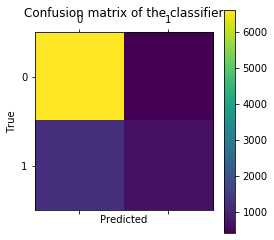

In [17]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [18]:
print(sm.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.

In [19]:
# limit to probability for class = 1
base_probs = clf.predict_proba(X_test)[:,1]
# calculate roc_auc_score
print(sm.roc_auc_score(y_test, base_probs))

0.7549265494550094


e) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [20]:
y_pred_train = clf.predict(X_train)

In [21]:
cm_train = sm.confusion_matrix(y_train,y_pred_train)
cm_train

array([[16320,     4],
       [    7,  4669]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

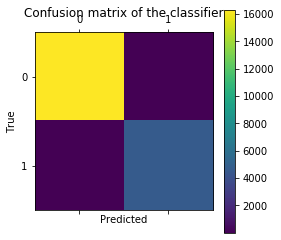

In [22]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [23]:
print(sm.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



In [24]:
# limit to probability for class = 1
base_probs_train = clf.predict_proba(X_train)[:,1]
# calculate roc_auc_score
print(sm.roc_auc_score(y_train, base_probs_train))

0.9999960435484266


**Explanation** - There are clear signs of overfitting. The precision, recall, f1-score and roc_auc score are very high indicating overfitting.

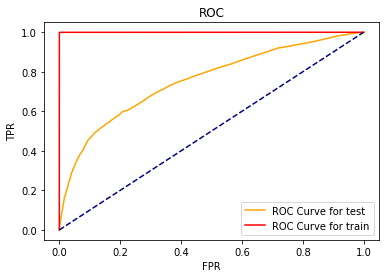

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import pylab as pl
# Plot roc curves
fpr, tpr, thresholds = roc_curve(y_test, base_probs)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, base_probs_train)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'orange', label = "ROC Curve for test")
plt.plot(fpr_train, tpr_train, color = 'red', label = "ROC Curve for train")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel ('FPR')
plt.ylabel ('TPR')
plt.title ('ROC')
plt.legend(loc='lower right')
plt.show()

### 3. Random Forest Classifier - Grid Search:

Start by creating a simple Random Forest only using default parameters.

a) Use the RandomForestClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following: 

n_estimators: 50, 100, 500  
max_features: 2, 4, sqrt  
max_depth: 6, 8, 10, 12  

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[5, 100, 500],
    'max_features':[2, 4, 'sqrt'],
    'max_depth':[6, 8, 10, 12]}


# create Random Forest model 
rf_obj=RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [27]:
rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'max_features': [2, 4, 'sqrt'],
                         'n_estimators': [5, 100, 500]},
             scoring='roc_auc', verbose=5)

b) Identify the best performing model

In [28]:
rf_Grid.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 500}

In [29]:
rf_Grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=500)

c) Use the best estimator model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [30]:
clf = RandomForestClassifier(max_depth=10, max_features=4, n_estimators=500, n_jobs = -1)

In [31]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=500,
                       n_jobs=-1)

In [32]:
y_pred_rf = clf.predict(X_test)

In [33]:
y_score_rf = clf.predict_proba(X_test)
y_score_rf

array([[0.83679133, 0.16320867],
       [0.90602935, 0.09397065],
       [0.87541251, 0.12458749],
       ...,
       [0.88341234, 0.11658766],
       [0.90939513, 0.09060487],
       [0.92366227, 0.07633773]])

d) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

In [34]:
cm_train = sm.confusion_matrix(y_test,y_pred_rf)
cm_train

array([[6686,  354],
       [1259,  701]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

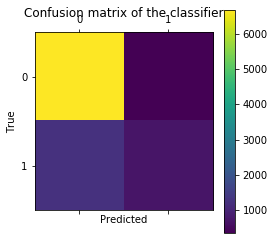

In [35]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [36]:
print(sm.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



e) Calculate the roc_auc_score for this model.

In [37]:
# limit to probability for class = 1
base_probs = clf.predict_proba(X_test)[:,1]
# calculate roc_auc_score
print(sm.roc_auc_score(y_test, base_probs))

0.7748012450718924


f) Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [38]:
y_pred_train = clf.predict(X_train)

In [39]:
cm_train = sm.confusion_matrix(y_train,y_pred_train)
cm_train

array([[15914,   410],
       [ 2519,  2157]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

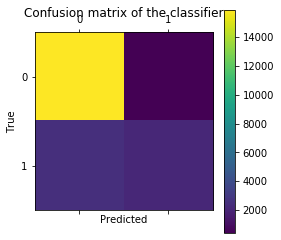

In [40]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [41]:
print(sm.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92     16324
           1       0.84      0.46      0.60      4676

    accuracy                           0.86     21000
   macro avg       0.85      0.72      0.76     21000
weighted avg       0.86      0.86      0.84     21000



In [42]:
# limit to probability for class = 1
base_probs_train = clf.predict_proba(X_train)[:,1]
# calculate roc_auc_score
print(sm.roc_auc_score(y_train, base_probs_train))

0.8645099140815927


**Explanation** - This model is performing better than the previous model. The precision, recall, f1-score and roc_auc_score are lower than the previous model indicating there is no overfitting. 

### 4. Create a feature importance plot for your best performing model.

In [43]:
clf.feature_importances_

array([0.03873411, 0.00443883, 0.0100461 , 0.0060285 , 0.02894769,
       0.22415904, 0.11717508, 0.07258329, 0.04719846, 0.03973646,
       0.03455485, 0.03801545, 0.03335856, 0.03075022, 0.02902453,
       0.02903259, 0.02918495, 0.041189  , 0.0334791 , 0.03228575,
       0.02724659, 0.02575736, 0.0270735 ])

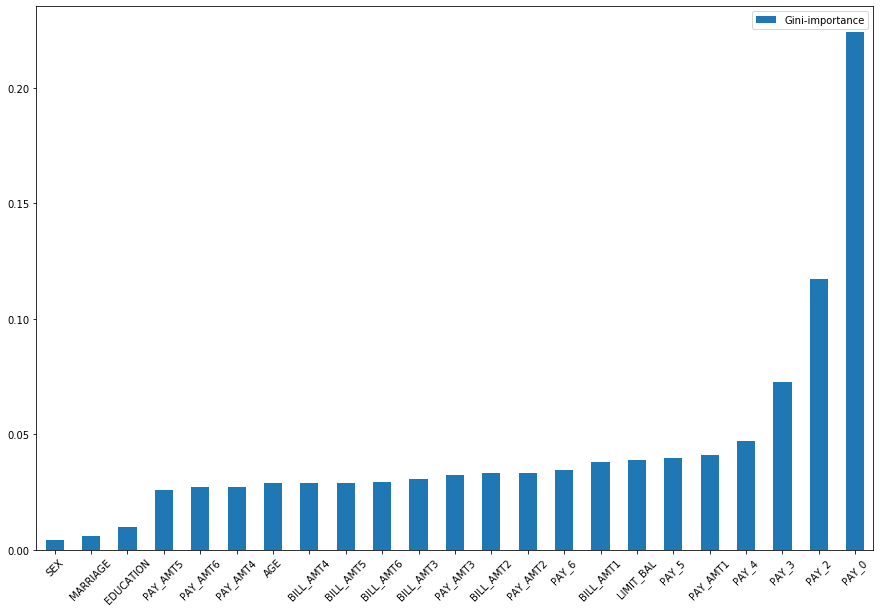

In [44]:
import pandas as pd
%matplotlib inline

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize = (15,10))

In [45]:
featureImp= []
for feat, importance in zip(X_train.columns, clf.feature_importances_):
    temp = [feat, importance*100]
    featureImp.append(temp)
fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

      Feature  Importance
5       PAY_0   22.415904
6       PAY_2   11.717508
7       PAY_3    7.258329
8       PAY_4    4.719846
17   PAY_AMT1    4.118900
9       PAY_5    3.973646
0   LIMIT_BAL    3.873411
11  BILL_AMT1    3.801545
10      PAY_6    3.455485
18   PAY_AMT2    3.347910
12  BILL_AMT2    3.335856
19   PAY_AMT3    3.228575
13  BILL_AMT3    3.075022
16  BILL_AMT6    2.918495
15  BILL_AMT5    2.903259
14  BILL_AMT4    2.902453
4         AGE    2.894769
20   PAY_AMT4    2.724659
22   PAY_AMT6    2.707350
21   PAY_AMT5    2.575736
2   EDUCATION    1.004610
3    MARRIAGE    0.602850
1         SEX    0.443883


a) What are the top 5 features for this model?

The top 5 features are:  
PAY_0    
PAY_2  
PAY_3  
PAY_4  
PAY_AMT1 

### 5. Conceptual Questions:

##### a) What are the best parameters from the Grid Search in Question # 3? Does the Model from #3 outperform Model #2? Explain why.

**Answer** -  
The best parameters from the grid search are {'max_depth': 12, 'max_features': 2, 'n_estimators': 500}  
The model in Q2 is overfitting to the training data as it gives the training auc roc score of 0.99. However the test auc roc score is 0.75.  
The model is Q3 is performing better as it is not overfitting the training data with an auc roc score of 0.86 and test auc roc score of 0.77

##### b) Overfitting is always a concern in ML problems. Does Model #3 overfit data more or less than Model #2? Explain why you think this is the case.  

**Answer** - As discussed in part a above, the Q2 model has higher training auc roc score of 0.99 but a lower test auc roc score of 0.75. This indicates the model is overfitting to the training data.  
On the other had, the model in Q3 has lower training auc roc score of 0.86 and 0.77 of test auc roc score. This model is not overfitting to the training data and is performing better on the test data as well.

##### c) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?).  

**Answer** - The Gini index is calculated with the formula
$$G_i = 1 - \sum_{k=1}^n p_{i,k}^2$$  

where $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

The gini index calculates the Gini impurity. A node is pure when it has gini = 0, i.e. when all training instances it applies to belong to the same class. If two classes are split evenly at a node then gini = 0.5

The algorithm works as 1 – ( P(class1)^2 + P(class2)^2 + … + P(classN)^2)  
At each node we want a variable split that has a low Gini Index.  
The tree keeps on splitting based on this gini index till either the pruning parameters are met or all classes are put in a leaf node.

##### d) Describe how Random Forest is different from bagging & why this difference can yield improved results.

**Answer** - 
In Random forest only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.  
Due to the random feature selection, the trees are more independent of each other compared to regular bagging, which often results in better predictive performance (due to better variance-bias trade-offs), and it is also faster than bagging, because each tree learns only from a subset of features.

##### e) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

**Answer** - The max depth is the longest path between the root node and the leaf node in a tree. The max depth parameter is used to limit the size of the tree. As the tree size increases, the model performance over the training data increases however this results in high variance and overfitting to the training data as this model will not be able to predict the test data properly.  
On the other hand, severly limiting the tree growth will increase the bias and the tree will underfit the training data. This model will not be able to capture all the information in the data properly.

##### f) In this homework we used k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model. 1) Describe how k-fold cross-validation works. 2) What benefit do we gain by using k-fold cross-validation when tuning our Random Forest model versus only using the train-test split approach?

**Answer** - 
1) In K-fold cross validation the data is divided into K folds. Out of the K folds, K-1 sets are used for training while the remaining set is used for testing. The algorithm is trained and tested K times, each time a new set is used as testing set while remaining sets are used for training. Finally, the result of the K-Fold Cross-Validation is the average of the results obtained on each set.  

2) If we only use single train-test split, then it can lead to variance problems where our accuracy obtrained on one test is very different to the accuracy obtrained on another test set using same algorithm. To avoid this problem, cross validation is used.